In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [27]:
from skimage import data, io, filters, viewer
#from scipy import constants
#from PIL import Image

/opt/conda/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


In [24]:
img1 = io.imread('blobs.tif', plugin="tifffile")
img2 = io.imread('FluorescentCells.tif', plugin="tifffile")
img3 = io.imread('FluorescentCells (2).tif', plugin="tifffile")

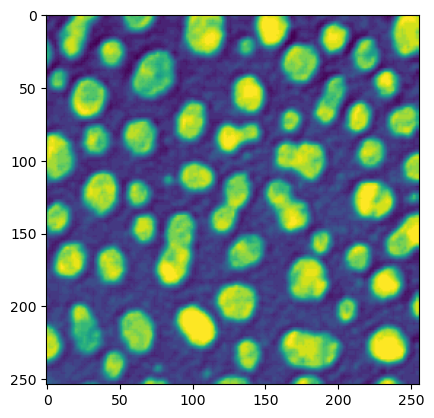

In [25]:
plt.imshow(img1)

In [40]:
img2_transpose = np.transpose(img2)

In [89]:
red = [(0, 0, 0), (1,0,0)]
green= [(0, 0, 0), (0,1,0)]
blue = [(0, 0, 0), (0,0,1)] 
yellow = [(0, 0, 0), (1,1,0) ]
magenta = [(0, 0, 0), (1,0,1)]
cyan = [(0, 0, 0), (0,1,1)]
lut_red = LinearSegmentedColormap.from_list("Custom", red, N=256)
lut_green = LinearSegmentedColormap.from_list("Custom", green, N=256)
lut_blue = LinearSegmentedColormap.from_list("Custom", blue, N=256)
lut_cyan = LinearSegmentedColormap.from_list("Custom", cyan, N=256)
lut_magenta = LinearSegmentedColormap.from_list("Custom", magenta, N=256)
lut_yellow = LinearSegmentedColormap.from_list("Custom", yellow, N=256)

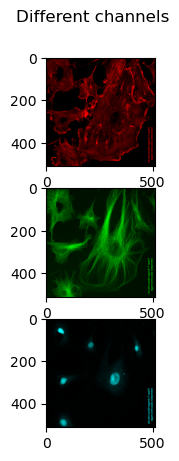

In [90]:
fig, axs = plt.subplots(3)
fig.suptitle('Different channels')
axs[0].imshow(img2_transpose[0], cmap=lut_red)
axs[1].imshow(img2_transpose[1],cmap=lut_green)
axs[2].imshow(img2_transpose[2],cmap=lut_cyan)